In [1]:
# Load Required Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 1) Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# Read movie data tsv file 
auto_mpg_data=pd.read_csv('auto-mpg.csv')

In [3]:
auto_mpg_data.shape

(398, 9)

In [4]:
auto_mpg_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
auto_mpg_data.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


# 2) Begin by prepping the data for modeling:

       1) Remove the car name column.

In [6]:
auto_mpg_df1 = auto_mpg_data

In [7]:
del auto_mpg_df1['car name']

In [8]:
auto_mpg_df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


After deleting 'car name' column, now we have 398 rows and 8 columns

2) The horsepower column values likely imported as a string data type. 
Figure out why and replace any strings with the column mean.

In [9]:
auto_mpg_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [10]:
#Horsepower,should contain integer/floating type values, is showing as object.
auto_mpg_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

found "?" in the data, will replace with horsepower mean value.

In [11]:
auto_mpg_df1['horsepower']= auto_mpg_df1['horsepower'].replace("?",(auto_mpg_df1['horsepower'] != '?').mean())
auto_mpg_df1['horsepower']=auto_mpg_df1['horsepower'].astype(np.float64)
auto_mpg_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Now we have converted the 'horsepower' to float 

In [12]:
#changing categorical variables into dummy variables
auto_mpg_df1 = pd.get_dummies(auto_mpg_df1,columns=['origin'])

In [13]:
auto_mpg_df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


# 3) Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [14]:
corr_auto_mpg = auto_mpg_df1.corr()
corr_auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.754774,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.822186,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.872519,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.754774,0.822186,0.872519,1.000000,0.838571,-0.674340,-0.411776,0.458234,-0.283106,-0.285770
weight,-0.831741,0.896017,0.932824,0.838571,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.674340,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411776,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.458234,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.283106,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.285770,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


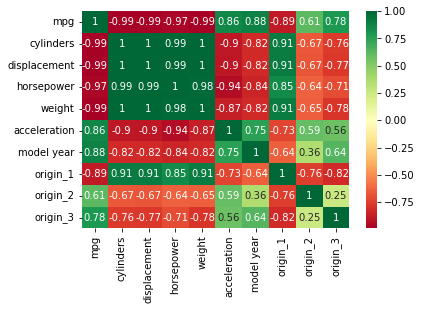

In [15]:
plt.figure(figsize=(6,4))  
p=sns.heatmap(corr_auto_mpg.corr(), annot=True,cmap ='RdYlGn', center = 0) 

From the above Cyclenders,displacement,Horsepower and Weight has the correlation with the MPG

# 4) Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

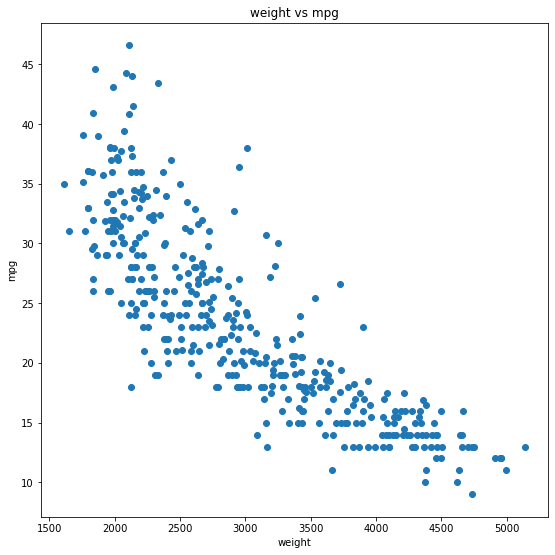

In [16]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(auto_mpg_df1[x],auto_mpg_df1['mpg'])
    plt.title(x+' vs mpg')
    plt.ylabel('mpg')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('weight', 1)


From the above graph its clearly understand that there is a
strong negitive correlation between Weight and MPG, when 
weight increases the MPG decrease.

In [17]:
#Copy all the predictor variables in X dataframe.
X = auto_mpg_df1.iloc[:,1:10]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [18]:
#since mpg is the dependent(target) variable so take it in y dataframe
Y = auto_mpg_df1.iloc[:,0:1]
Y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [19]:
#split the data into training and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=10)
#random state can be any number, it will keep the random sample data same irrecpective of multiple runs.

In [20]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
303,4,85.0,65.0,2020,19.2,79,0,0,1
347,4,85.0,65.0,1975,19.4,81,0,0,1
149,4,120.0,97.0,2489,15.0,74,0,0,1
100,6,250.0,88.0,3021,16.5,73,1,0,0
175,4,90.0,70.0,1937,14.0,75,0,1,0
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395,18.0,82,1,0,0
320,4,119.0,92.0,2434,15.0,80,0,0,1
15,6,198.0,95.0,2833,15.5,70,1,0,0
125,6,198.0,95.0,3102,16.5,74,1,0,0


In [21]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
331,4,97.0,67.0,2145,18.0,80,0,0,1
111,3,70.0,90.0,2124,13.5,73,0,0,1
350,4,105.0,63.0,2215,14.9,81,1,0,0
205,4,97.0,75.0,2155,16.4,76,0,0,1
56,4,91.0,70.0,1955,20.5,71,1,0,0
...,...,...,...,...,...,...,...,...,...
304,4,91.0,69.0,2130,14.7,79,0,1,0
187,8,305.0,140.0,4215,13.0,76,1,0,0
166,8,302.0,129.0,3169,12.0,75,1,0,0
64,8,318.0,150.0,4135,13.5,72,1,0,0


In [22]:
Y_train

,mpg
303,31.8
347,37.0
149,24.0
100,18.0
175,29.0
...,...
369,34.0
320,37.0
15,22.0
125,20.0


In [23]:
Y_test

,mpg
331,33.8
111,18.0
350,34.7
205,28.0
56,26.0
...,...
304,37.3
187,17.5
166,13.0
64,15.0


# 6) Train an ordinary linear regression on the training data.

In [24]:
#invoke the linear regression function and find the best fit model 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [25]:
md=reg.fit(X_train,Y_train)
md

LinearRegression()

In [26]:
#lets find out the coefficient for all independent variables
for idx, col_name in enumerate(X_train.columns):
    print("the coefficient for {} is {}".format(col_name,reg.coef_[0][idx]))

the coefficient for cylinders is -0.3632745375483844
the coefficient for displacement is 0.022577708882766098
the coefficient for horsepower is -0.005463253120308355
the coefficient for weight is -0.007269364017605037
the coefficient for acceleration is 0.1414735193533979
the coefficient for model year is 0.8001402312364735
the coefficient for origin_1 is -1.8704394303267178
the coefficient for origin_2 is 0.8870851987959847
the coefficient for origin_3 is 0.9833542315307326


In [27]:
#now let's find out the intercept for the model, intercept is the value that remains constant
#when all the independent variables are zero.
intercept = reg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.782270807374847


In [28]:
#checking the accuracy of the model
print("The accuracy of the test model is",(reg.score(X_test,Y_test)))

The accuracy of the test model is 0.7977762175166077


In [29]:
print("The accuracy of the train model is",(reg.score(X_train,Y_train)))

The accuracy of the train model is 0.8303089902915167


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

Y_train_ = poly.fit_transform(Y_train)
Y_test_ = poly.fit_transform(Y_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_,Y_train)

x_pred = poly_clf.predict(X_test_)
y_pred = poly_clf.predict(X_train_)


In [35]:
#let's check if the accuracy of the test model has been increased, great it's now 0.84 which was earlier 0.79,
#a slight improvment in the accuracy since we have taken the true interactions into account.
print("The improved accuracy of the test model is",(poly_clf.score(X_test_,Y_test)))

The improved accuracy of the test model is 0.8410865816025687


In [37]:
#let's check if the accuracy of the train model has been increased, great it's now 0.90 which was earlier 0.83,
#a slight improvment in the accuracy since we have taken the true interactions into account.
print("The improved accuracy of the train model is",(poly_clf.score(X_train_,Y_train)))

The improved accuracy of the train model is 0.9066937804199146


In [38]:
md.coef_

array([[-0.36327454,  0.02257771, -0.00546325, -0.00726936,  0.14147352,
         0.80014023, -1.87043943,  0.8870852 ,  0.98335423]])

# 7) Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [39]:
#Calculate R2 for test data

from sklearn.metrics import r2_score
R2 = r2_score(Y_test,x_pred)

print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R Squared: 0.8410865816025687
Adjusted R Squared: 0.823180844318351


In [40]:
# Calculate RMSE for test data

rmse_data = mean_squared_error(Y_test, x_pred)
rmse_data = np.sqrt(rmse_data)
print('Root Mean Squared Error(RMSE): {}'.format(rmse_data))



Root Mean Squared Error(RMSE): 3.117426800069682


In [41]:
#calculate MAE for test data
mae_data = mean_absolute_error(Y_test, x_pred)
print('Mean Absolute Error for model(MAE): {}'.format(mae_data))

Mean Absolute Error for model(MAE): 2.3318127724918654


In [42]:
#Calculate R2 for training data

from sklearn.metrics import r2_score
T_R2 = r2_score(Y_train,y_pred)

print('R Squared: {}'.format(T_R2))
n=X_train.shape[0]
p=X_train.shape[1] - 1

adj_rsquared = 1 - (1 - T_R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R Squared: 0.9066937804199146
Adjusted R Squared: 0.9042780854146049


In [43]:
# Calculate RMSE for training data

rmse_data = mean_squared_error(Y_train, y_pred)
rmse_data = np.sqrt(rmse_data)
print('Root Mean Squared Error(RMSE): {}'.format(rmse_data))


Root Mean Squared Error(RMSE): 2.3820592464766746


In [44]:
#calculate MAE for training data
mae_data = mean_absolute_error(Y_train, y_pred)
print('Mean Absolute Error for model(MAE): {}'.format(mae_data))

Mean Absolute Error for model(MAE): 1.7281328900668464


From the above analysis, 
For test data  R Squared value is 0.8410865816025687,Adjusted R Squared is  0.823180844318351,
the Root Mean Squared Error is 3.117426800069682, Mean Absolute Error for model(MAE) is 2.3318127724918654  

For Training data,R Squared is 0.9066937804199146, Adjusted R Squared is 0.9042780854146049,
the Root Mean Squared Error(RMSE) is 2.3820592464766746, Root Mean Squared Error(RMSE) is  2.3820592464766746

The model showed clear difference between 2 data sets, based on the above, R squared and Adjusted R squared 
is high for the training data set, also the the Root mean squared Error and Mean Absolute Error is less for Taining data.

Hence, the Train data set best fit for the regression line.

# 8) Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [45]:
# In this section, I chose to use Ridge Regression Model for the data

In [46]:
##Creating a Ridge Regression model
from sklearn.linear_model import Ridge
RLR = Ridge().fit(X_train,Y_train)
pred1 = RLR.predict(X_train)
pred2 = RLR.predict(X_test)


In [47]:
#Calculate R2 for test data

from sklearn.metrics import r2_score
R2 = r2_score(Y_test,pred2)

print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R Squared: 0.7977552107866137
Adjusted R Squared: 0.7749670655231335


In [48]:
# Calculate RMSE for test data

rmse_data = mean_squared_error(Y_test, pred2)
rmse_data = np.sqrt(rmse_data)
print('Root Mean Squared Error(RMSE): {}'.format(rmse_data))

Root Mean Squared Error(RMSE): 3.516856518019629


In [49]:
#calculate MAE for test data
mae_data = mean_absolute_error(Y_test, pred2)
print('Mean Absolute Error for model(MAE): {}'.format(mae_data))

Mean Absolute Error for model(MAE): 2.879196658262228


In [50]:
#Calculate R2 for training data

from sklearn.metrics import r2_score
T_R2 = r2_score(Y_train,pred1)

print('R Squared: {}'.format(T_R2))
n=X_train.shape[0]
p=X_train.shape[1] - 1

adj_rsquared = 1 - (1 - T_R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

R Squared: 0.8303042074378988
Adjusted R Squared: 0.8259107888602393


In [51]:
# Calculate RMSE for test data

rmse_data = mean_squared_error(Y_train, pred1)
rmse_data = np.sqrt(rmse_data)
print('Root Mean Squared Error(RMSE): {}'.format(rmse_data))

Root Mean Squared Error(RMSE): 3.2124235381174966


In [52]:
#calculate MAE for test data
mae_data = mean_absolute_error(Y_train, pred1)
print('Mean Absolute Error for model(MAE): {}'.format(mae_data))

Mean Absolute Error for model(MAE): 2.4358231847689744


For the test data vlues as follows.
R Squared: 0.7977552107866137,Adjusted R Squared: 0.7749670655231335,Root Mean Squared Error(RMSE): 3.516856518019629
 and Mean Absolute Error for model(MAE): 2.879196658262228.
    
For the train data values as follows, R Squared: 0.8303042074378988, Adjusted R Squared: 0.8259107888602393, Root Mean Squared Error(RMSE): 3.2124235381174966 and Mean Absolute Error for model(MAE): 2.4358231847689744 
    
Based on the above values Ridge Regression line fits better for the test data as the Root mean sqaued error and mean Absolute
Error is low for the Train data.
